In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",50)
import pickle
from matplotlib import style

In [2]:
df = pd.read_csv("student-mat.csv",sep=";")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
df = df[["G1","G2","G3","studytime","failures","absences"]]

In [5]:
df

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
...,...,...,...,...,...,...
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [6]:
df

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
...,...,...,...,...,...,...
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [7]:
# label
predict = "G3"

In [8]:
x = np.array(df.drop([predict],axis=1)) # conatins the feature columns excluding the target variable
y = np.array(df[predict]) # the target varibale 

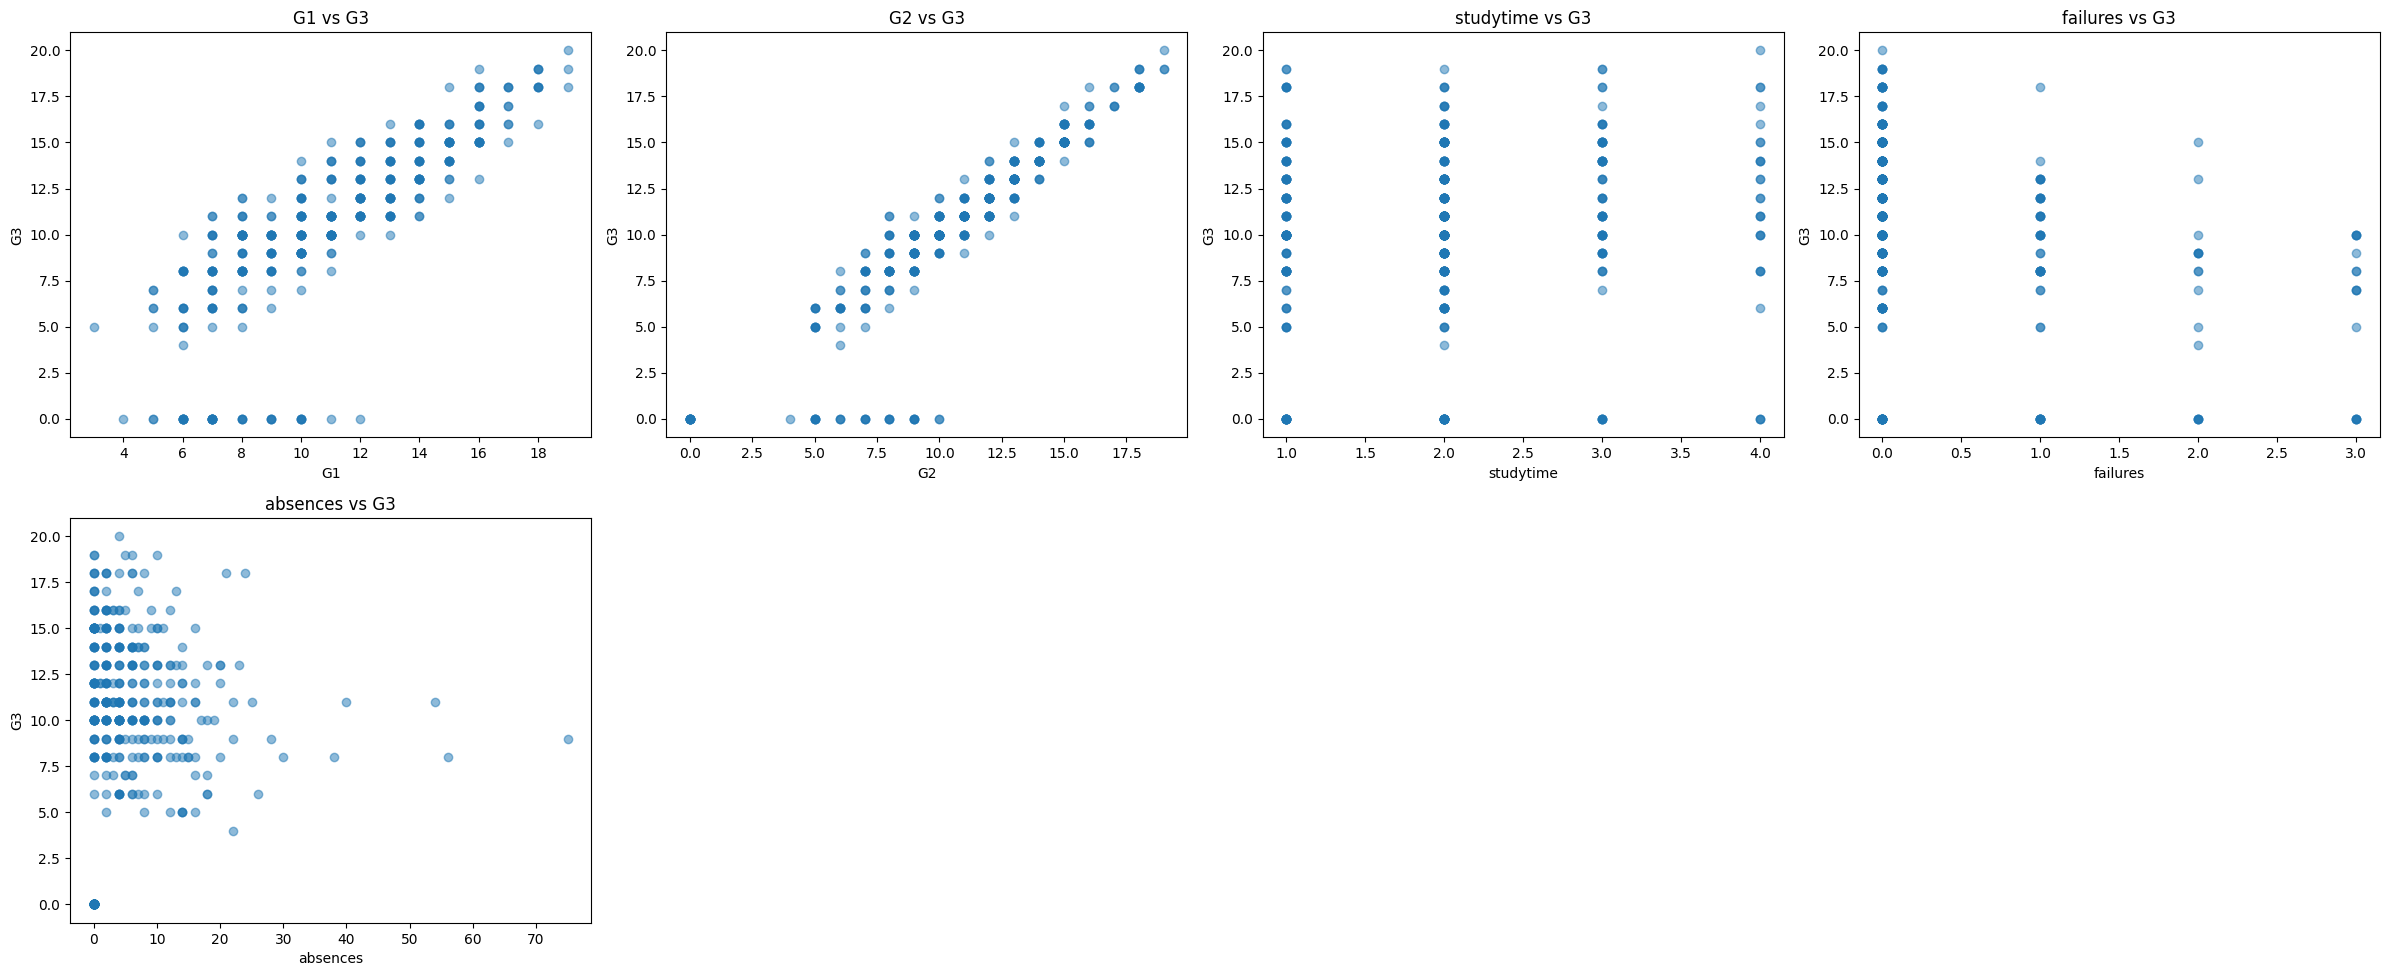

In [9]:
target = "G3"

# List of other variables
other_vars = ["G1", "G2", "studytime", "failures", "absences"]

# Number of plots
num_plots = len(other_vars)

# Create scatter plots
plt.figure(figsize=(24, 24))

for i, var in enumerate(other_vars):
    plt.subplot(num_plots, 4, i+1 ) # 2 columns # i+1 sets the position of subplot
    plt.scatter(df[var], df[target], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel(target)
    plt.title(f'{var} vs {target}')

plt.tight_layout()
plt.show()

#### we are trying to have training dataset and test dataset , we will train our model based on the training and let  it find the underlying patterns and then allow it to predict and see whether our predictions are correct

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)  # 10 percent data into test dataset

#### Linear regression is used when we have a data that directly correlates (mostly a string correlation) 
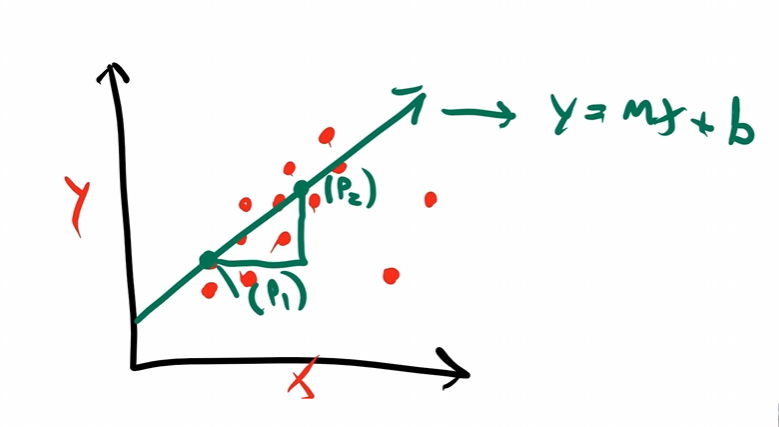
#### the computer is trying to find a best fit line for us on the attributes that we are using something like this
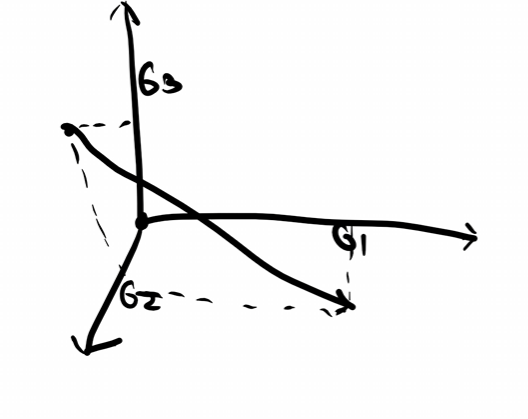

#### we created a loop for 30 times to find the best possible model and load it into the pickle file now we comment it out to not repeat the process and have the best model with us

In [12]:
# best = 0
# for _ in range(30):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)  # 10 percent data into test dataset
#     linear = linear_model.LinearRegression() # this invokes the LinearRegression model
#     linear.fit(x_train,y_train) # here we are trying to find the best fit line on our training datasets
#     accuracy = linear.score(x_test,y_test) #here we now want the score on how accurate is it
#     print(accuracy)
#     if accuracy >best:
#         with open("studentmodel.pickle","wb") as f:
#             pickle.dump(linear,f)

In [13]:
pickle_in =open("studentmodel.pickle","rb")
linear = pickle.load(pickle_in)

In [14]:
print("Coeff: \n",linear.coef_)
print("Intercept:",linear.intercept_)

Coeff: 
 [ 0.136374    0.98485271 -0.23264998 -0.32147956  0.03842631]
Intercept: -1.2663721783144695


##### we have kind of 5 m's for the y = mx + b and one intercept

In [15]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(round(predictions[x]),x_test[x],y_test[x])

9 [10  9  2  0  4] 9
18 [16 18  3  0  2] 18
13 [13 12  1  0 20] 12
11 [12 11  2  0  0] 12
11 [10 12  2  1  4] 12
6 [8 7 1 1 7] 8
4 [6 5 1 2 0] 0
4 [ 6  5  1  1 14] 5
15 [16 15  2  0  0] 15
14 [13 13  2  0 23] 13
9 [ 9 10  2  0  2] 9
12 [13 12  3  0  1] 12
15 [16 15  3  0  0] 15
11 [12 11  2  0 11] 11
15 [13 15  1  0  0] 15
-1 [6 0 2 0 0] 0
6 [7 8 2 3 2] 9
15 [14 15  2  0  0] 15
5 [8 6 2 2 2] 5
20 [18 19  1  0  6] 19
19 [19 18  2  0  2] 18
13 [14 13  3  0  8] 14
6 [7 7 2 1 2] 7
14 [15 14  2  0  4] 14
8 [7 9 1 1 2] 8
11 [12 12  4  0  1] 12
10 [ 8  9  1  1 38] 8
10 [11 10  1  0  8] 10
10 [10 11  4  0 10] 11
12 [14 12  4  0  6] 13
14 [14 14  1  0  2] 13
10 [12 10  2  0  8] 11
10 [10 10  1  0  4] 10
18 [19 18  3  0  0] 19
12 [13 12  2  1  2] 12
10 [10 10  2  0 17] 10
9 [ 8 10  2  0  6] 10
16 [15 16  3  0  2] 18
0 [8 0 1 0 0] 0
6 [6 7 2 0 0] 0


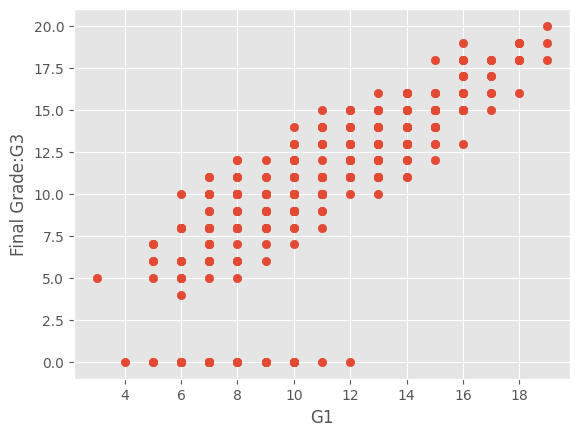

In [16]:
p = "G1"
style.use("ggplot")
plt.scatter(df[p],df["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade:G3")
plt.show()